In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors


url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

# Convertir las columnas numéricas a tipo float
numeric_columns = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone[numeric_columns] = abalone[numeric_columns].apply(pd.to_numeric, errors='coerce')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [35]:
#1 Eliminar la variable “Sex”.
abalone.drop(['Sex'], axis=1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
#2 Realice estadística descriptiva para el conjunto de datos entregados.
descripcion = abalone.describe()
print(descripcion)

            Length     Diameter       Height  Whole weight  Shucked weight   
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000  \
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

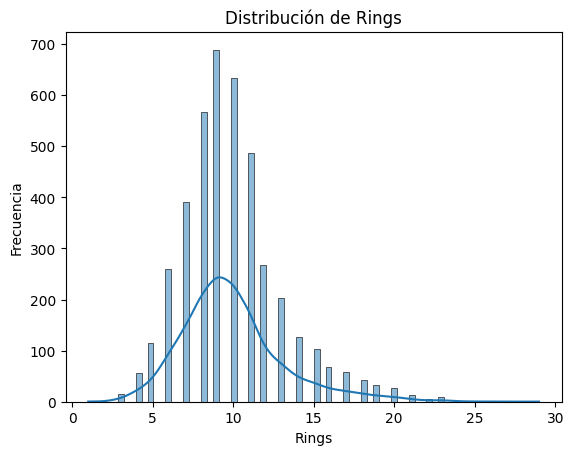

In [37]:
#3 La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.
sns.histplot(data=abalone, x="Rings", kde=True)
plt.title("Distribución de Rings")
plt.xlabel("Rings")
plt.ylabel("Frecuencia")
plt.show()

In [54]:
print(abalone.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


In [38]:
#4 Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?
abalone_sin_sex = abalone.drop("Sex", axis=1)
matriz_correlacion = abalone_sin_sex.corr()
print(matriz_correlacion.to_string())


                  Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  Shell weight     Rings
Length          1.000000  0.986812  0.827554      0.925261        0.897914        0.903018      0.897706  0.556720
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162        0.899724      0.905330  0.574660
Height          0.827554  0.833684  1.000000      0.819221        0.774972        0.798319      0.817338  0.557467
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405        0.966375      0.955355  0.540390
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000        0.931961      0.882617  0.420884
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961        1.000000      0.907656  0.503819
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617        0.907656      1.000000  0.627574
Rings           0.556720  0.574660  0.557467      0.540390        0.420884      

In [39]:
#5. Defina las distancias en los vectores de las variables independientes. Para esto puede usar el atributo 
independent_vars = abalone.drop("Rings", axis=1).values
print(independent_vars)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [55]:
#6. Guarde los datos en una matriz y úselo en este código:

# Obtener los valores de las variables independientes
independent_vars = abalone.drop("Sex", axis=1).values

# Calcular la distancia euclidiana entre los vectores de las variables independientes
distances = np.linalg.norm(independent_vars - independent_vars[0], axis=1)

# Imprimir las distancias
print(distances)


[0.         0.35925409 0.20756505 ... 0.79612578 0.72399137 1.6981406 ]


In [4]:
#7.Determine cuáles son los tres vecinos más cercanos.

# Obtener los vectores de las variables independientes
independent_vars = abalone.iloc[:, 1:-1].values

# Crear el objeto NearestNeighbors
k = 4  # Número de vecinos más cercanos a encontrar (incluyendo el vector mismo)
neighbors = NearestNeighbors(n_neighbors=k)

# Ajustar el modelo a los datos
neighbors.fit(independent_vars)

# Índice del vector para el que se buscarán los vecinos más cercanos
vector_index = 0

# Encontrar los vecinos más cercanos
distances, indices = neighbors.kneighbors([independent_vars[vector_index]])

# Imprimir los índices y distancias de los vecinos más cercanos
print("Vecinos más cercanos:")
for i in range(1, k):
    neighbor_index = indices[0][i]
    neighbor_distance = distances[0][i]
    print(f"Índice: {neighbor_index}, Distancia: {neighbor_distance}")

Vecinos más cercanos:
Índice: 3440, Distancia: 0.022214859891523085
Índice: 37, Distancia: 0.026809513236909
Índice: 624, Distancia: 0.03026962173533063
